# EDA

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score
from imblearn.over_sampling import SMOTE


# files containing the visualization is attached, please visit the file to see the visualization

In [4]:
df_org=pd.read_csv('C:\\Users\\Gaurav Yadav\\Documents\\kaggle datasets/classification/company bankrupcy prediction.csv')
df=df_org.copy()
print(df.isna().sum())

Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64


# splitting the data into training and test set and applying feature scaling

In [5]:
x=df.iloc[:,1:].values
y=df.iloc[:,0].values

x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)
df['Bankrupt?'].value_counts()

0    6599
1     220
Name: Bankrupt?, dtype: int64

# training model and predicting results for test set 

In [6]:
log=LogisticRegression()
log.fit(x_tr,y_tr)
y_pr=log.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1318
           1       0.44      0.15      0.23        46

    accuracy                           0.96      1364
   macro avg       0.70      0.57      0.60      1364
weighted avg       0.95      0.96      0.96      1364



C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1309,    9],
       [  39,    7]], dtype=int64)

rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

# Dealing with class imbalance,as prediction accuracy for one class is very poor

In [7]:
#model predict one class with very less accuracy this is due to class imbalance
from imblearn.over_sampling import SMOTE
sm=SMOTE()
x,y=sm.fit_resample(x,y)
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)

# building the model after balancing the class

In [8]:
log=LogisticRegression()
log.fit(x_tr,y_tr)
y_pr=log.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1269
           1       0.90      0.92      0.91      1371

    accuracy                           0.91      2640
   macro avg       0.91      0.91      0.91      2640
weighted avg       0.91      0.91      0.91      2640



C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1132,  137],
       [ 112, 1259]], dtype=int64)

In [9]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

              precision    recall  f1-score   support

           0       1.00      0.97      0.98      1269
           1       0.97      1.00      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



array([[1225,   44],
       [   4, 1367]], dtype=int64)

# ROC CURVE

Text(0, 0.5, 'True Positive Rate')

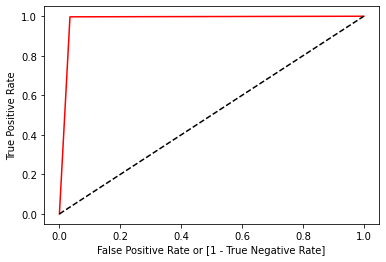

In [10]:
fpr,tpr,threshold=roc_curve(y_te,y_pr)

auc = roc_auc_score(y_te,y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')



# PCA to reduce the total number of columns,i.e instead of using all the columns for model building we'll use selected few without much change in accuracy of the model

In [11]:
from sklearn.decomposition import PCA
sm=SMOTE()
x=df.iloc[:,1:].values
y=df_org.iloc[:,0].values
x,y=sm.fit_resample(x,y)




In [12]:
pca=PCA()


sc_x=StandardScaler()
x=sc_x.fit_transform(x)
#x_te=sc_x.transform(x_te)

pca_val=pca.fit_transform(x)

var=pca.explained_variance_ratio_

In [13]:
var[0:50].sum()
#first 50 columns have about 95% of the data

0.945212329989211

In [14]:
#from variance of PCAs it is evident that first 50 components contains 86% info
#creating df with first 50 pca as features

l=[]

for i in range(1,51):
    s='pca'
    s=s+str(i)
    l.append(s)
df2=pd.DataFrame(pca_val[:,0:50],columns=l)
df2.shape
    

(13198, 50)

In [15]:
x=df2.iloc[:,0:50].values
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc=StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_te=sc.transform(x_te)



In [16]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1269
           1       0.97      0.99      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



array([[1226,   43],
       [   9, 1362]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

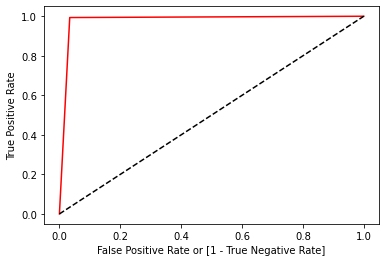

In [17]:
fpr,tpr,threshold=roc_curve(y_te,y_pr)
auc = roc_auc_score(y_te,y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


# model validation by using KFold cross validation

In [18]:
from sklearn.model_selection import KFold,cross_val_score

In [19]:
kfold=KFold(n_splits=20,random_state=0)
result=cross_val_score(rf,StandardScaler().fit_transform(df2.iloc[:,0:50].values),y,cv=kfold)
print(result.mean())

C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


0.9751505954844346


In [20]:
#from above result it is evident that our random forest model's accuracy is quite consistent

# There are some columns which are highly correlated,so dropping some of them and rebuilding our model

In [ ]:
#to observe the correlation b/w various features
z=df_org.corr()

In [6]:
j=1
x=96
l=[]
l2=[]
l3=[]
y=96
i=1
d={}
while i<y:
    
    j=1
    z1=0
    l=[]
    while j<x:
        if i!=j and z.iloc[i:i+1,j:j+1].values>=.8 and j not in l:
            l.append(j)
            z1=z1+1
            l3.append(z.iloc[:,j:j+1].columns)
            if i not in l2:
        
                l2.append(i)
        j=j+1
    if z1!=0 and df_org.iloc[0:,i:i+1].columns not in l3 :
        d[tuple(df_org.iloc[0:,i:i+1].columns)]=[df_org.iloc[0:,l].columns]
        
    if z1==0:
        i=i+1
    
    else:
        i=i+z1

            
            
            

df_org.iloc[0:,l].columns


df=df_org.drop(columns=[' ROA(A) before interest and % after tax',' ROA(B) before interest and depreciation after tax',' Net Income to Total Assets', ' Realized Sales Gross Margin',' Gross Profit to Sales', ' Pre-tax net Interest Rate',' After-tax net Interest Rate',' Continuous interest rate (after tax)',' Persistent EPS in the Last Four Seasons',
         ' Per Share Net profit before tax (Yuan ¥)',
         ' Operating profit/Paid-in capital',' Net profit before tax/Paid-in capital',' Regular Net Profit Growth Rate',' Current Liability to Assets',' Current Liabilities/Equity', ' Current Liability to Equity', ' Liability to Equity',' Current Liability to Liability',])


            

In [7]:
df.columns
#'Inventory Turnover Rate (times)' and 'Interest-bearing debt interest rate' values are not in terms of  rate but are absolute values so renaming these columns  
#'fixed assets to asset' value shold be <1 but it is in terms of billions so assuming it is the value of fixed assets so renaming that column
#' Interest-bearing debt interest rate',it is not rate but absolute value so renaming it 
#' Quick Ratio' column's values are not in practical range ,either this is the value of quick assets so renaming it. 
df.rename(columns={' Quick Ratio':'Quick Assets',' Interest-bearing debt interest rate':'Interest-bearing debt', ' Fixed Assets to Assets':'fixed assets',' Inventory Turnover Rate (times)':'Inventory turnover',' Interest-bearing debt interest rate':'Interest bearing debt interest'},inplace=True)

# Dealing with class imbalance and splitting the data into training and test set ,then applying feature scaling

In [19]:
#model predict one class with very less accuracy this is due to class imbalance
from imblearn.over_sampling import SMOTE
y=df.iloc[:,0].values
x=df.iloc[:,1:].values

sm=SMOTE()
x,y=sm.fit_resample(x,y)
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc_x=StandardScaler()
x_tr=sc_x.fit_transform(x_tr)
x_te=sc_x.transform(x_te)

In [20]:
log=LogisticRegression()
log.fit(x_tr,y_tr)
y_pr=log.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      1269
           1       0.89      0.91      0.90      1371

    accuracy                           0.90      2640
   macro avg       0.90      0.90      0.90      2640
weighted avg       0.90      0.90      0.90      2640



C:\ProgramData\Anaconda3a\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([[1122,  147],
       [ 120, 1251]], dtype=int64)

In [21]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1269
           1       0.97      1.00      0.98      1371

    accuracy                           0.98      2640
   macro avg       0.98      0.98      0.98      2640
weighted avg       0.98      0.98      0.98      2640



array([[1223,   46],
       [   6, 1365]], dtype=int64)

Text(0, 0.5, 'True Positive Rate')

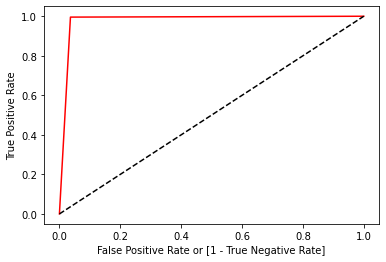

In [22]:
fpr,tpr,threshold=roc_curve(y_te,y_pr)
auc = roc_auc_score(y_te,y_pr)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')


# PCA to reduce the total number of columns,i.e instead of using all the columns for model building we'll use selected few without much change in accuracy of the model


In [45]:
sm=SMOTE()
x=df.iloc[:,1:].values
y=df_org.iloc[:,0].values
x,y=sm.fit_resample(x,y)


In [46]:
pca=PCA()


sc_x=StandardScaler()
x=sc_x.fit_transform(x)
#x_te=sc_x.transform(x_te)

pca_val=pca.fit_transform(x)

var=pca.explained_variance_ratio_

In [47]:
#from variance of PCAs it is evident that first 50 components contains 86% info
#creating df with first 50 pca as features

l=[]

for i in range(1,51):
    s='pca'
    s=s+str(i)
    l.append(s)
df2=pd.DataFrame(pca_val[:,0:50],columns=l)
df2.shape
    

(13198, 50)

In [1]:
x=df2.iloc[:,0:50].values
x_tr,x_te,y_tr,y_te=train_test_split(x,y,test_size=.2,random_state=0)
sc=StandardScaler()
x_tr=sc.fit_transform(x_tr)
x_te=sc.transform(x_te)

NameError: name 'df2' is not defined

In [2]:
rf=RandomForestClassifier(n_estimators=500,random_state=0)
rf.fit(x_tr,y_tr)
y_pr=rf.predict(x_te)
print(classification_report(y_te,y_pr))
confusion_matrix(y_te,y_pr)

NameError: name 'RandomForestClassifier' is not defined

# Model validation using KFold cross validation

In [ ]:
kfold=KFold(n_splits=20,random_state=0)
result=cross_val_score(rf,StandardScaler().fit_transform(df2.iloc[:,0:50].values),y,cv=kfold)
print(result.mean())